In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Heart_Disease_Dataset.csv")

In [3]:
(N,D) = df.shape
print(f"Number of Samples: {N}, Number of features: {D-1}")

Number of Samples: 1190, Number of features: 11


In [16]:
print("Number of null features and samples:")
print(df.isnull().sum())

Number of null features and samples:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [5]:
half = int(N/2)
num_class_1 = df['target'].sum()
num_class_0 = N - df['target'].sum()
print(f"Number of Samples {N}, Half of Samples: {half}")
print(f"Class 1: {num_class_1}, Class 0: {num_class_0}")

if num_class_0 != num_class_1:
    if num_class_0 > num_class_1:
        print("The classes are unbalanced, with a larger number of samples in class 0 than in class 1.")
    else:
        print("The classes are unbalanced, with a larger number of samples in class 1 than in class 0.")
else:
    print("The classes are balanced.")


Number of Samples 1190, Half of Samples: 595
Class 1: 629, Class 0: 561
The classes are unbalanced, with a larger number of samples in class 1 than in class 0.


In [6]:
age_class_1 = df[df["target"]==1]["age"]
age_class_0 = df[df["target"]==0]["age"]
sex_class_1 = df[df["target"]==1]["sex"]
sex_class_0 = df[df["target"]==0]["sex"]

C:\Users\Hamed\AppData\Local\Temp\ipykernel_1952\409318149.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


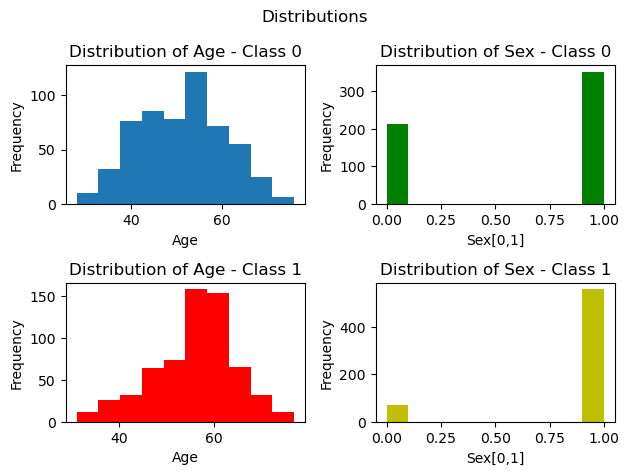

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)
ax[0,0].hist(age_class_0,label="Age-Class 0")
ax[0,0].set_title("Distribution of Age - Class 0")
ax[0,0].set(xlabel="Age",ylabel="Frequency")

ax[1,0].hist(age_class_1, label="Age-Class 1", color = "r")
ax[1,0].set_title("Distribution of Age - Class 1")
ax[1,0].set(xlabel="Age",ylabel="Frequency")

ax[0,1].hist(sex_class_0, label="Sex-Class 0", color = "g")
ax[0,1].set_title("Distribution of Sex - Class 0")
ax[0,1].set(xlabel="Sex[0,1]",ylabel="Frequency")

ax[1,1].hist(sex_class_1, label="Sex-Class 1", color = "y")
ax[1,1].set_title("Distribution of Sex - Class 1")
ax[1,1].set(xlabel="Sex[0,1]",ylabel="Frequency")
fig.suptitle("Distributions")

fig.tight_layout()
fig.show()

In [8]:
# Zscore

from scipy.stats import zscore

z_scores = np.abs(zscore(df))

threshold = 3
outliers = np.where(z_scores > threshold)

indices = list(outliers[0])
removed_df = df.drop(indices, axis=0)

num_outliers = len(indices)
final_size = removed_df.shape[0]

print(f"Number of Outliers: {num_outliers}")
print(f"Final Size: {final_size}")


Number of Outliers: 28
Final Size: 1162


In [9]:
# [0,1]
Max = removed_df.max()
Min = removed_df.min()

In [10]:
numeric_labels = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
for col in numeric_labels:
    removed_df[col] = (removed_df[col] - Min[col])/(Max[col] - Min[col])


In [11]:
# Learning 

X = removed_df.drop(columns="target",axis=1)
y = removed_df["target"]

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C = [0.1,1,10,100,1000]
Degree = [1,5,9,11,15,21]
Gamma = [0.01,0.1,0.5,0.75,0.9]
x1 = len(C)
x2 = len(Degree)
x3 = len(Gamma)

acc_lin = np.zeros((x1,x2,x3))
acc_rbf = np.zeros((x1,x2,x3))
acc_poly = np.zeros((x1,x2,x3))

i = 0
j = 0
k = 0

for c in C:
    for deg in Degree:
        for gam in Gamma:
            model_lin = SVC(C=c,kernel="linear",gamma=gam,degree=deg)
            model_rbf = SVC(C=c,kernel="rbf",gamma=gam,degree=deg)
            model_poly = SVC(C=c,kernel="poly",gamma=gam,degree=deg)

            model_lin.fit(X_train,y_train)
            model_rbf.fit(X_train,y_train)
            model_poly.fit(X_train,y_train)
            
            acc_lin[i,j,k] = accuracy_score(y_test,model_lin.predict(X_test))
            acc_rbf[i,j,k] = accuracy_score(y_test,model_rbf.predict(X_test))
            acc_poly[i,j,k] = accuracy_score(y_test,model_poly.predict(X_test))
            print(f"Test Accuracy for each model [c, degree, gamma] = [{c}, {deg}, {gam}]: \n Linear: {acc_lin[i,j,k]:.4f}, RBF: {acc_rbf[i,j,k]:.4f}, Poly: {acc_poly[i,j,k]:.4f}")
            k += 1
        k=0
        j += 1
    j=0
    i += 1

            
            

Test Accuracy for each model [c, degree, gamma] = [0.1, 1, 0.01]: 
 Linear: 0.8223, RBF: 0.7736, Poly: 0.6504
Test Accuracy for each model [c, degree, gamma] = [0.1, 1, 0.1]: 
 Linear: 0.8223, RBF: 0.8338, Poly: 0.8252
Test Accuracy for each model [c, degree, gamma] = [0.1, 1, 0.5]: 
 Linear: 0.8223, RBF: 0.8453, Poly: 0.8223
Test Accuracy for each model [c, degree, gamma] = [0.1, 1, 0.75]: 
 Linear: 0.8223, RBF: 0.8395, Poly: 0.8223
Test Accuracy for each model [c, degree, gamma] = [0.1, 1, 0.9]: 
 Linear: 0.8223, RBF: 0.8338, Poly: 0.8223
Test Accuracy for each model [c, degree, gamma] = [0.1, 5, 0.01]: 
 Linear: 0.8223, RBF: 0.7736, Poly: 0.5186
Test Accuracy for each model [c, degree, gamma] = [0.1, 5, 0.1]: 
 Linear: 0.8223, RBF: 0.8338, Poly: 0.8367
Test Accuracy for each model [c, degree, gamma] = [0.1, 5, 0.5]: 
 Linear: 0.8223, RBF: 0.8453, Poly: 0.8453
Test Accuracy for each model [c, degree, gamma] = [0.1, 5, 0.75]: 
 Linear: 0.8223, RBF: 0.8395, Poly: 0.8481
Test Accuracy f

Test Accuracy for each model [c, degree, gamma] = [10, 11, 0.1]: 
 Linear: 0.8281, RBF: 0.8510, Poly: 0.8596
Test Accuracy for each model [c, degree, gamma] = [10, 11, 0.5]: 
 Linear: 0.8281, RBF: 0.8539, Poly: 0.8367
Test Accuracy for each model [c, degree, gamma] = [10, 11, 0.75]: 
 Linear: 0.8281, RBF: 0.8424, Poly: 0.8367
Test Accuracy for each model [c, degree, gamma] = [10, 11, 0.9]: 
 Linear: 0.8281, RBF: 0.8424, Poly: 0.8367
Test Accuracy for each model [c, degree, gamma] = [10, 15, 0.01]: 
 Linear: 0.8281, RBF: 0.8309, Poly: 0.5186
Test Accuracy for each model [c, degree, gamma] = [10, 15, 0.1]: 
 Linear: 0.8281, RBF: 0.8510, Poly: 0.8653
Test Accuracy for each model [c, degree, gamma] = [10, 15, 0.5]: 
 Linear: 0.8281, RBF: 0.8539, Poly: 0.8510
Test Accuracy for each model [c, degree, gamma] = [10, 15, 0.75]: 
 Linear: 0.8281, RBF: 0.8424, Poly: 0.8510
Test Accuracy for each model [c, degree, gamma] = [10, 15, 0.9]: 
 Linear: 0.8281, RBF: 0.8424, Poly: 0.8510
Test Accuracy fo

In [12]:
# Best accuracy index and best accuracy
best_acc_inx_lin =np.unravel_index(np.argmax(acc_lin, axis=None), acc_lin.shape)
best_acc_inx_rbf = np.unravel_index(np.argmax(acc_rbf, axis=None), acc_rbf.shape)
best_acc_inx_poly = np.unravel_index(np.argmax(acc_poly, axis=None), acc_poly.shape)
best_acc_lin = acc_lin[best_acc_inx_lin]
best_acc_rbf = acc_rbf[best_acc_inx_rbf]
best_acc_poly = acc_poly[best_acc_inx_poly]

In [13]:
print(f"Best Parameters for Linear Kernel:\n C:{C[best_acc_inx_lin[0]]}, Degree:{Degree[best_acc_inx_lin[1]]}, Gamma:{Gamma[best_acc_inx_lin[2]]}, Test Accuracy: {best_acc_lin:.4f}. \n")
print(f"Best Parameters for RBF Kernel:\n C:{C[best_acc_inx_rbf[0]]}, Degree:{Degree[best_acc_inx_rbf[1]]}, Gamma:{Gamma[best_acc_inx_rbf[2]]}, Test Accuracy: {best_acc_rbf:.4f}. \n")
print(f"Best Parameters for Polynominal Kernel:\n C:{C[best_acc_inx_poly[0]]}, Degree:{Degree[best_acc_inx_poly[1]]}, Gamma:{Gamma[best_acc_inx_poly[2]]}, Test Accuracy: {best_acc_poly:.4f}. \n")

Best Parameters for Linear Kernel:
 C:1, Degree:1, Gamma:0.01, Test Accuracy: 0.8309. 

Best Parameters for RBF Kernel:
 C:100, Degree:1, Gamma:0.1, Test Accuracy: 0.8625. 

Best Parameters for Polynominal Kernel:
 C:1000, Degree:15, Gamma:0.1, Test Accuracy: 0.8825. 



In [14]:
# Learn Best Classifier
model_lin = SVC(C=C[best_acc_inx_lin[0]],kernel="linear",gamma=Gamma[best_acc_inx_lin[2]],degree=Degree[best_acc_inx_lin[1]])
model_rbf = SVC(C=C[best_acc_inx_rbf[0]],kernel="rbf",gamma=Gamma[best_acc_inx_rbf[2]],degree=Degree[best_acc_inx_rbf[1]] )
model_poly = SVC(C=C[best_acc_inx_poly[0]],kernel="poly",gamma=Gamma[best_acc_inx_poly[2]],degree=Degree[best_acc_inx_poly[1]])

model_lin.fit(X_train,y_train)
model_rbf.fit(X_train,y_train)
model_poly.fit(X_train,y_train)


SVC(C=1000, degree=15, gamma=0.1, kernel='poly')

In [15]:
# Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

pred_lin = model_lin.predict(X_test)

recall_lin = recall_score(y_test,pred_lin)
precision_lin = precision_score(y_test,pred_lin)
f1_lin = f1_score(y_test,pred_lin)
accuracy_lin = accuracy_score(y_test,pred_lin)

print("Linear Kernel:")
print(f"Precision: {precision_lin:.4f}, Recall: {recall_lin:.4f}, Accurcay: {accuracy_lin:.4f}, F1-Score: {f1_lin:.4f}.")

pred_rbf = model_rbf.predict(X_test)

recall_rbf = recall_score(y_test,pred_rbf)
precision_rbf = precision_score(y_test,pred_rbf)
f1_rbf = f1_score(y_test,pred_rbf)
accuracy_rbf = accuracy_score(y_test,pred_rbf)
print("***")
print("RBF Kernel:")
print(f"Precision: {precision_rbf:.4f}, Recall: {recall_rbf:.4f}, Accurcay: {accuracy_rbf:.4f}, F1-Score: {f1_rbf:.4f}.")

pred_poly = model_poly.predict(X_test)

recall_poly = recall_score(y_test,pred_poly)
precision_poly = precision_score(y_test,pred_poly)
f1_poly = f1_score(y_test,pred_poly)
accuracy_poly = accuracy_score(y_test,pred_poly)
print("***")
print("Plynominal Kernel:")
print(f"Precision: {precision_poly:.4f}, Recall: {recall_poly:.4f}, Accurcay: {accuracy_poly:.4f}, F1-Score: {f1_poly:.4f}.")

Linear Kernel:
Precision: 0.8020, Recall: 0.8950, Accurcay: 0.8309, F1-Score: 0.8460.
***
RBF Kernel:
Precision: 0.8276, Recall: 0.9282, Accurcay: 0.8625, F1-Score: 0.8750.
***
Plynominal Kernel:
Precision: 0.8723, Recall: 0.9061, Accurcay: 0.8825, F1-Score: 0.8889.
